In [48]:
import torch
import time
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch.autograd import Variable
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
import os
import cv2
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import random
from matplotlib import pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
class ImageTransform():
    def __init__(self,resize,mean,std):
        self.data_transform={
            'train': transforms.Compose([
                transforms.RandomResizedCrop(resize,scale=(0.5,1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ]),
            'val':transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ])
        }
    def __call__(self,img,phase):
        return self.data_transform[phase](img)

In [169]:
cat_directory = r'./dl_pytorch/chap06/data/dogs-vs-cats/Cat'
dog_directory = r'./dl_pytorch/chap06/data/dogs-vs-cats/Dog'

cat_images_filepaths = sorted([os.path.join(cat_directory,f) for f in os.listdir(cat_directory)]) #경로.../cat01.jpg 로 합쳐줌
dog_images_filepaths = sorted([os.path.join(dog_directory,f) for f in os.listdir(dog_directory)])


images_filepaths = [*cat_images_filepaths,*dog_images_filepaths] # 경로 리스트 괄호 제거하고 넣어줌
correct_images_filepaths=[i for i in images_filepaths if cv2.imread(i) is not None] # 이미지 읽어지면 경로에 추가

random.seed(42)
random.shuffle(correct_images_filepaths)
train_images_filepaths = correct_images_filepaths[:400]
val_images_filepaths = correct_images_filepaths[400:-10]
test_images_filepaths = correct_images_filepaths[-10:]
print(len(train_images_filepaths),len(val_images_filepaths),len(test_images_filepaths))

['./dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.151.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.6.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.205.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.35.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.7.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.182.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.238.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.30.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.165.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.121.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.26.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.23.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.219.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.237.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.135.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Cat\\cat.94.jpg', './dl_pytorch/chap06/data/dogs-vs-cats/Dog\\dog.145.jpg', './dl_pytorch/chap06/d

In [172]:
cat_directory = r'./dl_pytorch/chap06/data/PetImages/Cat' ## 캐글에서 받은 2만장짜리 dataset으로 진행해보자
dog_directory = r'./dl_pytorch/chap06/data/PetImages/Dog'

cat_images_filepaths = sorted([os.path.join(cat_directory,f) for f in os.listdir(cat_directory)])
dog_images_filepaths = sorted([os.path.join(dog_directory,f)for f in os.listdir(dog_directory)])
images_filepaths = [*cat_images_filepaths,*dog_images_filepaths]
correct_images_filepaths = [i for i in images_filepaths if (cv2.imread(i) is not None and cv2.imread(i).shape[-1]!=1)] # grayscale 파일 예외처리
random.seed(101)
random.shuffle(correct_images_filepaths)
train_images_filepaths = correct_images_filepaths[:12000]
print(train_images_filepaths)
val_images_filepaths = correct_images_filepaths[12000:-10]
test_images_filepaths = correct_images_filepaths[-10:]
print(len(train_images_filepaths),len(val_images_filepaths),len(test_images_filepaths))

['./dl_pytorch/chap06/data/PetImages/Cat\\8010.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\9307.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\1041.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\11238.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\7512.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\1995.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\8117.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\4691.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\3161.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\741.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\1362.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\5330.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\6332.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\6091.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\12384.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\125.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\2525.jpg', './dl_pytorch/chap06/data/PetImages/Dog\\2710.jpg', './dl_pytorch/chap06/data/PetImages/Cat\\2708.jpg', './dl_pytor

In [171]:
for path in images_filepaths:
    print(path)

./dl_pytorch/chap06/data/PetImages/Cat\0.jpg
./dl_pytorch/chap06/data/PetImages/Cat\1.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10.jpg
./dl_pytorch/chap06/data/PetImages/Cat\100.jpg
./dl_pytorch/chap06/data/PetImages/Cat\1000.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10000.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10001.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10002.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10003.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10004.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10005.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10006.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10007.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10008.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10009.jpg
./dl_pytorch/chap06/data/PetImages/Cat\1001.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10010.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10011.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10012.jpg
./dl_pytorch/chap06/data/PetImages/Cat\10013.jpg
./dl_pytorch/chap06/data/PetImages/

In [130]:
def display_image_grid(images_filepaths,predicted_labels=(),cols=5):
    rows = len(images_filepaths)//cols
    figure,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(12,6))
    for i,image_filepath in enumerate(images_filepaths):
        image=cv2.imread(image_filepath)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ## 이미지 색상 변경. 입력 이미지의 색상이 BGR인데, RGB로 바꾸겠다
        true_label = os.path.normpath(image_filepath).split(os.sep)[-2] # 이미지 전체 경로 정규화. os.sep ->/ or \ 기준 나눔. 마지막에서 두번째 아이템->label
        predicted_label = predicted_labels[i] if predicted_labels else true_label
        color = "green" if true_label == predicted_label else "red"
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(predicted_label,color=color)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

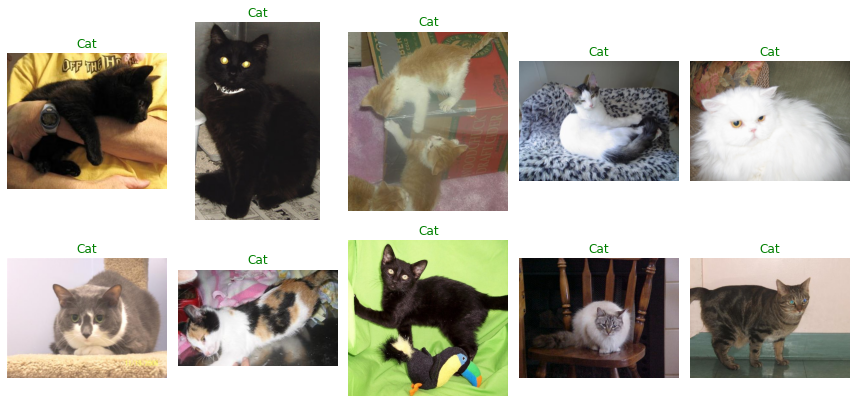

In [113]:
display_image_grid(test_images_filepaths)

In [198]:
class DogvsCatDataset(Dataset):
    def __init__(self,file_list,transform=None,phase='train'):
        self.file_list=file_list
        self.transform=transform ## 생성할 때 transform 매개변수 받아옴
        self.phase=phase
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img= img.convert('RGB') #이거 안해줘서 오류났을수도
        img_transformed = self.transform(img,self.phase)
        #label = img_path.split('\\')[-1].split('.')[0] ## string parsing. dog/cat 가져옴 - 예시용 splitting
        label = img_path.split('\\')[0].split('/')[-1] # 캐글에서 가져온 dataset용 label 추출
        if label=='Dog':
            label=1
        elif label=='Cat':
            label=0
        return img_transformed,label

In [201]:
size = 224
mean = (0.4,0.5,0.5)
std = (0.229,0.224,0.225)
batch_size = 32

In [178]:
train_dataset = DogvsCatDataset(train_images_filepaths,transform=ImageTransform(size,mean,std),phase='train')
val_dataset = DogvsCatDataset(val_images_filepaths,transform=ImageTransform(size,mean,std),phase='val')

index = 0
print(train_dataset.__getitem__(index)[0].size()) ## img 출력
print(train_dataset.__getitem__(index)[1]) # label 출력

torch.Size([3, 224, 224])
0


In [199]:
train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=batch_size,shuffle=False)
dataloader_dict = {'train':train_dataloader,'val':val_dataloader}

batch_iterator = iter(train_dataloader)
inputs,label = next(batch_iterator)
print(inputs.size())
print(label)

torch.Size([32, 3, 224, 224])
tensor([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0])


In [180]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn1 = nn.Conv2d(3,16,5,1,0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.cnn2 = nn.Conv2d(16,32,5,1,0)
        self.relu2=nn.ReLU()
        self.maxpool2=nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32*53*53,512)
        self.relu5=nn.ReLU()
        self.fc2=nn.Linear(512,2)
        self.output=nn.Softmax(dim=1)

    def forward(self,x):
        out=self.cnn1(x)
        out=self.relu1(out)
        out=self.maxpool1(out)
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        out=self.fc2(out)
        out=self.output(out)
        return out


In [181]:
model = LeNet()
print(model)

LeNet(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=89888, out_features=512, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (output): Softmax(dim=1)
)


In [182]:
from torchsummary import summary
model.to(device)
summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 220, 220]           1,216
              ReLU-2         [-1, 16, 220, 220]               0
         MaxPool2d-3         [-1, 16, 110, 110]               0
            Conv2d-4         [-1, 32, 106, 106]          12,832
              ReLU-5         [-1, 32, 106, 106]               0
         MaxPool2d-6           [-1, 32, 53, 53]               0
            Linear-7                  [-1, 512]      46,023,168
            Linear-8                    [-1, 2]           1,026
           Softmax-9                    [-1, 2]               0
Total params: 46,038,242
Trainable params: 46,038,242
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 19.47
Params size (MB): 175.62
Estimated Total Size (MB): 195.67
--------------------------------

In [183]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 46,038,242 trainable parameters


In [184]:
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
criterion = nn.CrossEntropyLoss()
model.to(device)
criterion.to(device)

CrossEntropyLoss()

In [185]:
def train_model(model,dataloader_dict,criterion,optimizer,num_epoch):
    since = time.time()
    best_acc =0.0

    for epoch in range(num_epoch):
        print(f'Epoch{epoch+1}/{num_epoch}')
        print('-'*20)

        for phase in['train','val']:
            if phase =='train':
                model.train()
            else:
                model.eval()
            epoch_loss=0.0
            epoch_corrects=0

            for inputs,labels in tqdm(dataloader_dict[phase]):
                inputs =inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(inputs)
                    _,preds = torch.max(outputs,1)
                    loss = criterion(outputs,labels)

                    if phase=='train':
                        loss.backward()
                        optimizer.step()
                    epoch_loss += loss.item()*inputs.size(0) ## 오차와 입력을 곱하는 이유? ->손실함수에 reduction parameter 디폴트 = mean 이기 때문. 전체 오차의 평균을 반환하기 때문에, loss를 계산하는 동안 배치 사이즈를 로스에 곱해줘야 한다.
                    epoch_corrects +=torch.sum(preds==labels.data)

            epoch_loss = epoch_loss / len(dataloader_dict[phase].dataset)
            epoch_acc = epoch_corrects.double()/len(dataloader_dict[phase].dataset)

            print(f'{phase} Loss:{epoch_loss:.4f} Ac: {epoch_acc:.4f}')

            if phase=='val' and epoch_acc>best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
    time_elapsed = time.time() -since
    print(f'Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'Best val Acc:{best_acc:.4f}')
    return model


In [203]:
import time
num_epoch = 10
model = train_model(model,dataloader_dict,criterion,optimizer,num_epoch) # large dataset으로 하니까 밑에 나는 오류가 남. 왜 나는지 모르겠어서 일단 보류.

Epoch1/10
--------------------


C:\Users\user\AppData\Local\Temp\ipykernel_11388\614049921.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for inputs,labels in tqdm(dataloader_dict[phase]):


  0%|          | 0/375 [00:00<?, ?it/s]

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [67]:
import pandas as pd

id_list = []
pred_list = []
_id = 0

with torch.no_grad(): # test시에는 gradient 계산할 필요 없음
    for test_path in tqdm(test_images_filepaths):
        img = Image.open(test_path)
        _id=test_path.split('\\')[-1].split('.')[1]
        transform = ImageTransform(size,mean,std)
        img = transform(img,phase='val')
        img = img.unsqueeze(0) # 차원 추가.
        img = img.to(device)

        model.eval()
        outputs = model(img)
        preds = F.softmax(outputs,dim=1)[:,1].tolist() #지정된 차원을 따라 텐서 정규화
        id_list.append(_id)
        pred_list.append(preds[0])

        res = pd.DataFrame({
            'id':id_list,
            'label':pred_list
        })
        res.sort_values(by='id',inplace=True)
        res.reset_index(drop=True,inplace=True)

        res.to_csv('./dl_pytorch/chap06/data/LeNet',index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_11388\727557842.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for test_path in tqdm(test_images_filepaths):


  0%|          | 0/10 [00:00<?, ?it/s]

In [68]:
res.head(10)

,id,label
0,109,0.459550
1,145,0.444579
2,15,0.570344
3,162,0.471176
4,167,0.500501
5,200,0.417112
6,210,0.604288
7,211,0.549317
8,213,0.436797
9,224,0.527775


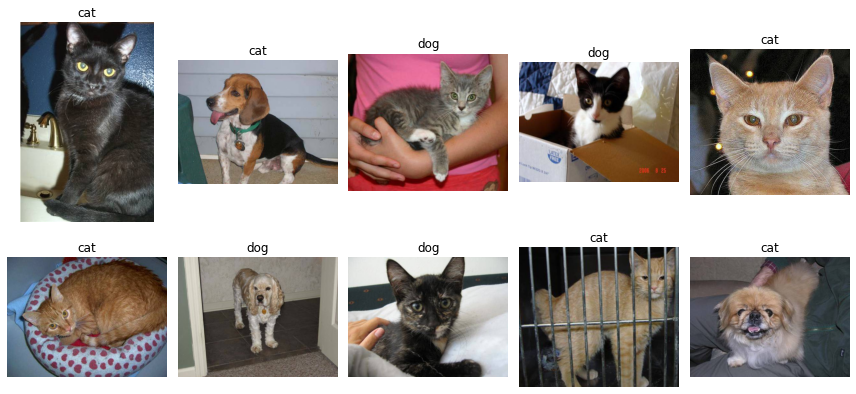

In [70]:
class_ = classes = {0:'cat',1:'dog'}
def display_image_grid(images_filepaths,predicted_labels=(),cols=5):
    rows = len(images_filepaths)//cols
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(12,6))
    for i,images_filepath in enumerate(images_filepaths):
        image = cv2.imread(images_filepath)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        a = random.choice(res['id'].values)
        label = res.loc[res['id']==a,'label'].values[0]
        if label>0.5:
            label=1
        else:
            label=0
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(class_[label])
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()
display_image_grid(test_images_filepaths)

6.1.2 Alexnet.